In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_csv('housing.data',delim_whitespace = True,header = None)

In [3]:
data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

Using only half of the data points from both the features <b>INDUS</b> and <b>NOX</b> for better visualization.
Creating lists x & y with all the odd data points from the respective features.

In [4]:
d1 = list(data['INDUS'])
d2 = list(data['NOX'])
x = []
y = []
x_mean = 0
y_mean = 0
for i in range(1,507,2):
    y.append(d2[i])
    y_mean += d2[i]
    x.append(d1[i])
    x_mean += d1[i]

Calculating <b>MEAN</b> of both the features, denoted as <b>x</b> & <b>y</b>. 

In [5]:
x_mean = x_mean/len(x)
y_mean = y_mean/len(y)

The regression line passes through the <b>centroid</b> which has co-ordinates as below.

In [6]:
centroid = (x_mean,y_mean)

Calculating the $ b_0 $ <b><i>(intercept)</i></b> and $ b_1 $ <b><i>(slope)</i></b> of the regresion line.

\begin{equation*}
b_1 = \frac {\sum_{i=1}^n \left(x_i - \bar{x} \right) \left( y_i - \bar{y} \right)}{\sum_{i=1}^n \left(x_i - \bar{x}\right)^2} 
\end{equation*}

\begin{equation*}
b_0 = \bar{y} - b_1x
\end{equation*}

Here,

$\bar{x}$ and $\bar{y}$ are means of $x$ and $y$ resp.

In [7]:
b1 = 0
b1_num = 0
b1_den = 0
for i in range(len(x)):
    b1_num = b1_num + ((x[i] - x_mean) * (y[i] - y_mean))
    b1_den = b1_den + (x[i] - x_mean) ** 2

b1 = b1_num/b1_den
b0 = y_mean - b1 * x_mean

Calculating $\hat{y_i}$, which is the predicted value of $y$ for every $ x_i $.

\begin{equation*}
\hat{y_i} = b_1x_i + b_0
\end{equation*}

It signifies,
$y$ increases by a factor of $b_1$ for every unit change in $x$.
The value of $b_0$ may/may not mean anything in the real world. 

In [8]:
y_i_hat = []
for i in range(len(x)):
    y_i_hat.append(b1 * x[i] + b0)

Calculating <i>Sum of Square of Errors</i> <b>(SSE)</b> and <i>Total Sum of Square of Errors</i> <b>(SST)</b> for the dataset.

\begin{equation*}
SSE = \sum_{i=1}^n \left(y_i - \hat{y_i}\right)^2
\end{equation*}

\begin{equation*}
SST = \sum_{i=1}^n \left(y_i - \bar{y_i}\right)^2
\end{equation*}

Also,

\begin{equation*}
SST - SSE = SSR                                                                           (1)
\end{equation*}

$SSR$ is <b><i>Sum of Squares of Regression</i></b>

<img src = "three_squared_diff.png"></img>

In [14]:
SSE = 0
SST = 0
for i in range(len(x)):
    SSE += (y[i] - y_i_hat[i]) ** 2
    SST += (y[i] - y_mean) ** 2
    
SSR = SST - SSE
print(SSE,SST,SSR)

1.388996420052061 3.423852269090908 2.0348558490388466


In [10]:
x_cood = np.linspace((np.max(x) + 1), np.min(x) - 1, 500)
y_cood = b0 + b1 * x_cood

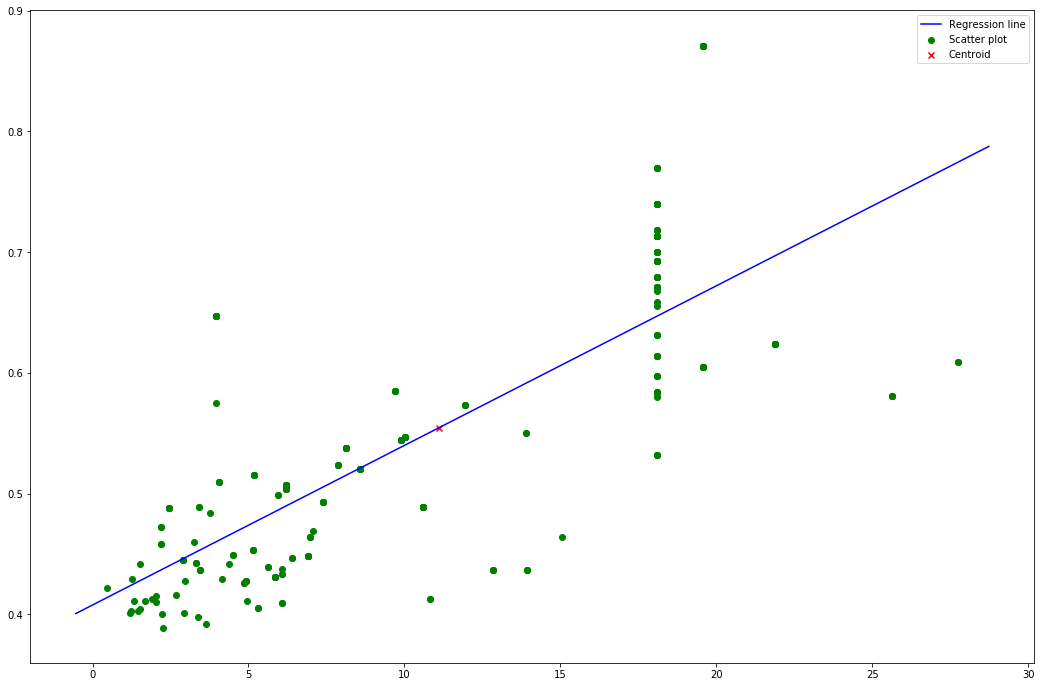

In [11]:
plt.figure(figsize = (18,12))
plt.scatter(x,y,color = "green",label = 'Scatter plot')
plt.scatter(x_mean,y_mean,marker = 'x',color = 'red', label = 'Centroid')
plt.plot(x_cood,y_cood,color = 'blue',label = 'Regression line')
plt.legend(loc = 'upper right')

Calculating $r^2$, which is the coefficient of determination and is given as,
\begin{equation*}
r^2 = 1 - \frac{SSE}{SST}
\end{equation*}
<i>or</i>
\begin{equation*}
r^2 = \frac{SSR}{SST}
\end{equation*}

$\;\because$ from eqn. (1) above.

The value of $r^2$ ranges from 0 to 1. The closer it is to 1, the better is the regression model i.e. the model is a good fit (it fits well).
It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

In [24]:
r_2 = 1 - SSE/SST
print(r_2)

0.5943176542424642


It means that <i>59.43%</i> of the SST can be explained by using the estimated regression equation to predict the $y$.
As $r^2$ is not so close to 1, our regression model is <b><i>NOT A GOOD FIT</i></b>. 